In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams.update({'axes.labelsize': '22',
                     'xtick.labelsize':'18',
                     'ytick.labelsize': '18',
                     'legend.fontsize': '18',
                     'figure.figsize': (8, 8)})

def increase_linewidth(ax):
    lines = ax.get_lines()
    for line in lines:
        line.set_linewidth(3)
    leg = ax.legend()
    leg_lines = leg.get_lines()
    plt.setp(leg_lines, linewidth=5)

In [3]:
question_type = "force"
directory = "sequence_length_plots/"
stats = pd.read_hdf(directory+question_type+"_stats.h5")

In [4]:
stats.seq_length = "length="+stats.seq_length

/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


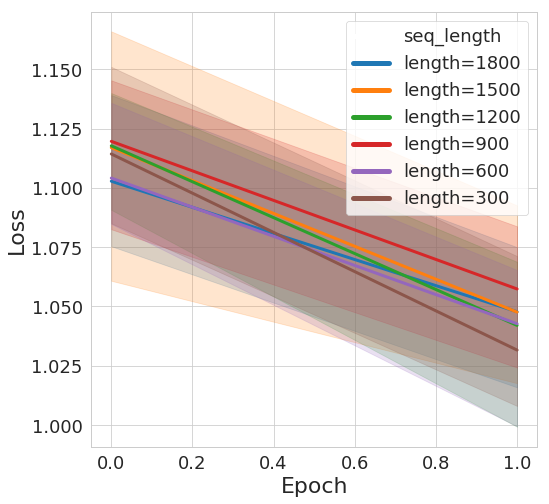

In [5]:
ax = sns.lineplot(x="Epoch", y="Loss", hue="seq_length",  markers=True, data=stats)
increase_linewidth(ax)
plt.savefig(directory+question_type+"_losses.pdf")

stats.groupby("seq_length").max()[["Train Accuracy", "Val Accuracy"]].plot.bar()
plt.ylabel("Accuracy")
plt.xlabel("")
matplotlib2tikz.save(directory+question_type+"_acc_hist.tikz")

for label in stats.seq_length.unique():
    sns.lineplot(x="Epoch", y="Val Accuracy", data=stats[stats.seq_length == label])
    sns.lineplot(x="Epoch", y="Train Accuracy", data=stats[stats.seq_length == label])
    
    plt.title(label)
    plt.legend(labels=["Validation", "Training"], loc=2)
    plt.ylabel("Accuracy")
    plt.grid()
    matplotlib2tikz.save(directory+question_type+"_"+label+"_acc_plot.tikz")
    plt.show()

/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


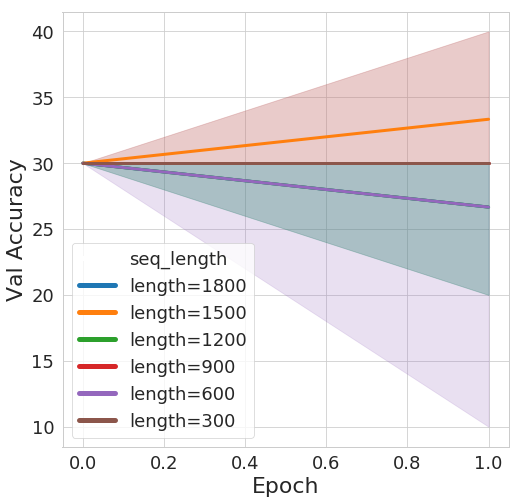

NameError: name 'matplotlib2tikz' is not defined

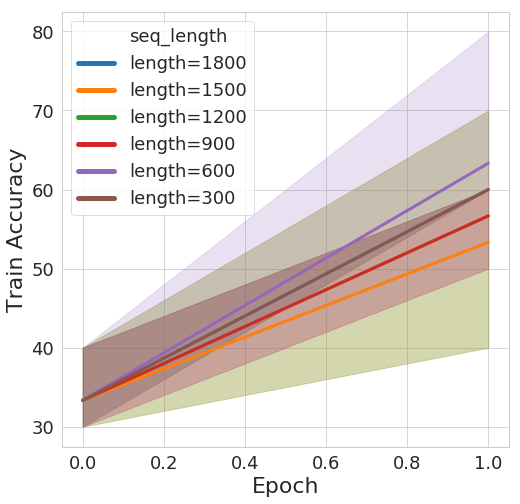

In [6]:
ax = sns.lineplot(x="Epoch", y="Val Accuracy", hue="seq_length", data=stats)
increase_linewidth(ax)
plt.savefig(directory+question_type+"_all_val_acc_plot.pdf")
plt.show()
ax = sns.lineplot(x="Epoch", y="Train Accuracy", hue="seq_length", data=stats)
increase_linewidth(ax)
matplotlib2tikz.save(directory+question_type+"_all_train_acc_plot.pdf")